In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("supply_chain_extended_data (2).csv")

In [3]:
df.columns


Index(['Warehouse_ID', 'Location', 'Current_Stock', 'Demand_Forecast',
       'Lead_Time_Days', 'Shipping_Time_Days', 'Stockout_Risk',
       'Operational_Cost', 'Supplier_ID', 'Product_Category', 'Monthly_Sales',
       'Order_Processing_Time', 'Return_Rate', 'Customer_Rating',
       'Warehouse_Capacity', 'Storage_Cost', 'Transportation_Cost',
       'Backorder_Quantity', 'Damaged_Goods', 'Employee_Count'],
      dtype='object')

In [4]:
df.shape

(500, 20)

In [5]:
df.head(5)

,Warehouse_ID,Location,Current_Stock,Demand_Forecast,Lead_Time_Days,Shipping_Time_Days,Stockout_Risk,Operational_Cost,Supplier_ID,Product_Category,Monthly_Sales,Order_Processing_Time,Return_Rate,Customer_Rating,Warehouse_Capacity,Storage_Cost,Transportation_Cost,Backorder_Quantity,Damaged_Goods,Employee_Count
0,WH239,Dallas,3926,484,8,3,7,93895,S693,Groceries,4893,4.766231,6.053952,3.840976,28701,16975,2778,228,26,83
1,WH244,Houston,3032,5122,3,6,25,46847,S880,Electronics,4453,4.304335,3.886996,2.113929,36198,14052,1535,288,16,39
2,WH340,Chicago,4763,4343,5,5,16,64176,S116,Furniture,5956,1.030779,7.335160,4.211437,22784,9863,13435,153,3,49
3,WH428,Atlanta,2219,777,7,6,15,38940,S431,Apparel,5814,2.871244,1.393481,1.751671,13172,15911,14508,143,39,35
4,WH202,Dallas,809,4756,2,7,16,33933,S821,Electronics,2279,4.060930,4.212666,4.231919,39619,19011,1904,296,30,67


In [6]:
df.dtypes

Warehouse_ID              object
Location                  object
Current_Stock              int64
Demand_Forecast            int64
Lead_Time_Days             int64
Shipping_Time_Days         int64
Stockout_Risk              int64
Operational_Cost           int64
Supplier_ID               object
Product_Category          object
Monthly_Sales              int64
Order_Processing_Time    float64
Return_Rate              float64
Customer_Rating          float64
Warehouse_Capacity         int64
Storage_Cost               int64
Transportation_Cost        int64
Backorder_Quantity         int64
Damaged_Goods              int64
Employee_Count             int64
dtype: object

In [7]:
df.isnull().sum()

Warehouse_ID             0
Location                 0
Current_Stock            0
Demand_Forecast          0
Lead_Time_Days           0
Shipping_Time_Days       0
Stockout_Risk            0
Operational_Cost         0
Supplier_ID              0
Product_Category         0
Monthly_Sales            0
Order_Processing_Time    0
Return_Rate              0
Customer_Rating          0
Warehouse_Capacity       0
Storage_Cost             0
Transportation_Cost      0
Backorder_Quantity       0
Damaged_Goods            0
Employee_Count           0
dtype: int64

In [8]:
# Calculating average shipping time by location 

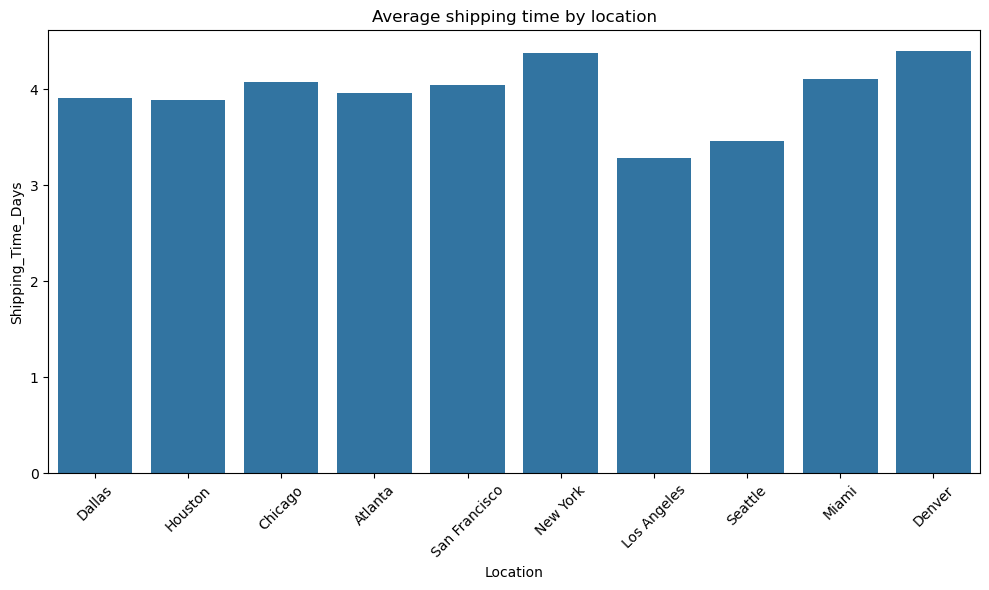

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Location', y='Shipping_Time_Days', errorbar=None)
plt.title('Average shipping time by location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
# Calculating Delivery performance trough warehouses

In [11]:


df['Avg_leadtime'] = df.groupby ('Warehouse_ID')['Lead_Time_Days'].transform('mean')
df['Avg_processingtime'] = df.groupby ('Warehouse_ID')['Order_Processing_Time'].transform('mean')
df['Avg_shippingtime'] = df.groupby ('Warehouse_ID')['Shipping_Time_Days'].transform('mean')

delivery = df[['Warehouse_ID','Location','Avg_leadtime','Avg_processingtime','Avg_shippingtime']]

delivery.head(10)

,Warehouse_ID,Location,Avg_leadtime,Avg_processingtime,Avg_shippingtime
0,WH239,Dallas,6.250000,4.301937,2.0
1,WH244,Houston,3.000000,4.304335,6.0
2,WH340,Chicago,5.500000,1.098942,4.5
3,WH428,Atlanta,5.333333,3.136243,4.0
4,WH202,Dallas,3.500000,3.243743,4.5
5,WH211,San Francisco,7.500000,1.327668,2.0
6,WH008,Atlanta,7.000000,3.084797,7.0
7,WH438,Atlanta,7.500000,3.400946,5.0
8,WH106,New York,6.500000,2.775649,3.5
9,WH099,New York,7.000000,2.146315,5.0


In [12]:
top5 = delivery.sort_values(by='Avg_leadtime', ascending=False).head(5)



melted = top5.melt(id_vars =['Warehouse_ID'],
                  value_vars=['Avg_leadtime','Avg_processingtime','Avg_shippingtime'],
                  var_name= 'type',
                  value_name= 'days')



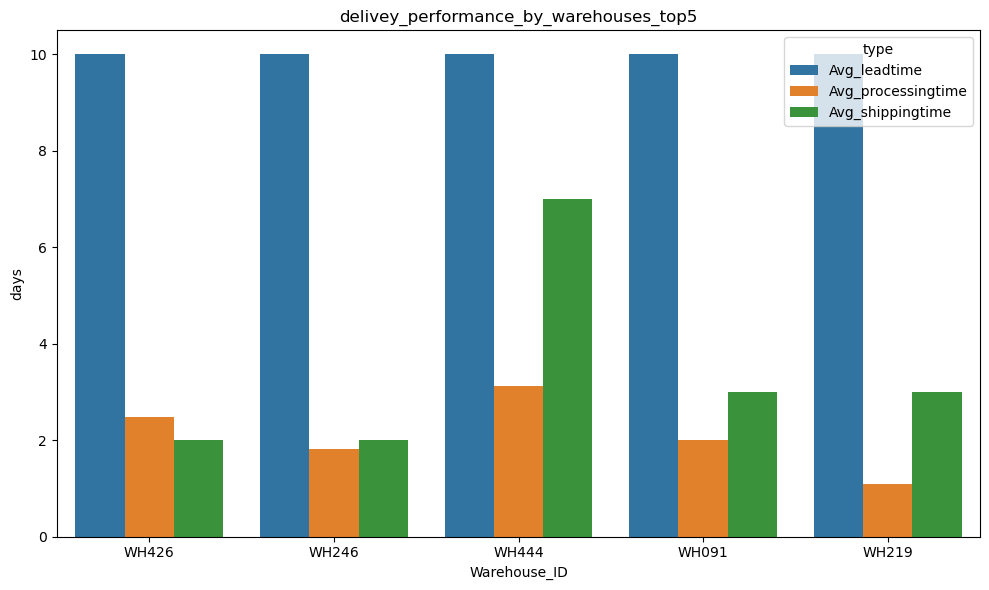

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(data=melted,x='Warehouse_ID', y='days',hue='type')
plt.title('delivey_performance_by_warehouses_top5')
plt.tight_layout()

In [14]:
# Analysing inventory management

In [15]:
df['stock_utilization'] = df ['Current_Stock'] / df ['Warehouse_Capacity']
df['backorder_ratio'] = df ['Backorder_Quantity'] / df ['Demand_Forecast']
df ['storage_cost_perunit'] = df ['Storage_Cost'] / df ['Current_Stock']

In [16]:
inventory_metrix = df.groupby (['Warehouse_ID','Location']).agg({
    'stock_utilization' : 'mean',
    'backorder_ratio' : 'mean',
    'storage_cost_perunit' : 'mean',
    'Stockout_Risk' : 'mean'
}).reset_index()
    


In [17]:
inventory_metrix_sorted = inventory_metrix.sort_values (by='stock_utilization', ascending = False)

In [18]:
print (inventory_metrix_sorted.head(10))

    Warehouse_ID       Location  stock_utilization  backorder_ratio  \
374        WH396    Los Angeles           0.442484         0.232258   
195        WH196  San Francisco           0.441265         0.143808   
216        WH221        Chicago           0.439964         0.019211   
465        WH491          Miami           0.430810         0.051619   
351        WH375         Denver           0.424658         0.031496   
167        WH165         Dallas           0.419603         0.013239   
91         WH088         Denver           0.416222         0.061304   
433        WH466    Los Angeles           0.381329         0.069329   
458        WH488         Dallas           0.371755         0.095273   
242        WH248        Atlanta           0.367632         0.146834   

     storage_cost_perunit  Stockout_Risk  
374              4.225208            9.0  
195              3.920615           21.0  
216              1.589116           15.0  
465              3.080524           11.0  
351

In [19]:
normalized = inventory_metrix.set_index ('Warehouse_ID')[['stock_utilization','backorder_ratio','storage_cost_perunit','Stockout_Risk']]

In [20]:
normalized = (normalized - normalized.min()) / (normalized.max() - normalized.min())

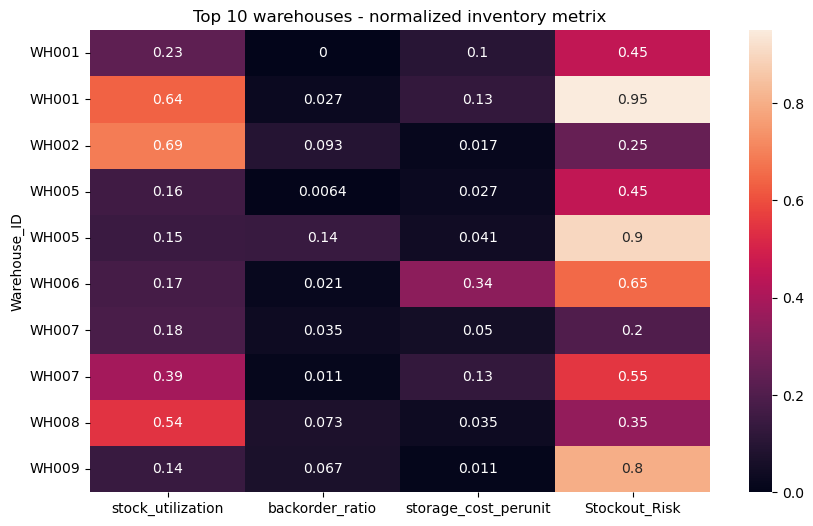

In [21]:
plt.figure (figsize=(10,6))
sns.heatmap(normalized.head(10), annot=True)
plt.title('Top 10 warehouses - normalized inventory metrix')
plt.show()

In [22]:
# Analysing inventory imbalance 

In [23]:
df['overstock'] = df['Current_Stock'] > df['Warehouse_Capacity'] * 0.9
df['understock'] = df['Current_Stock'] < df['Demand_Forecast'] 

In [24]:
imbalance_summary = df.groupby('Location')[['overstock','understock']].sum()

In [25]:
imbalance_long = imbalance_summary.reset_index().melt(
    id_vars='Location',
    var_name='imbalance_type',
    value_name='count'
)

In [26]:
print (imbalance_long)

         Location imbalance_type  count
0         Atlanta      overstock      0
1         Chicago      overstock      0
2          Dallas      overstock      0
3          Denver      overstock      0
4         Houston      overstock      0
5     Los Angeles      overstock      0
6           Miami      overstock      0
7        New York      overstock      0
8   San Francisco      overstock      0
9         Seattle      overstock      0
10        Atlanta     understock     29
11        Chicago     understock     21
12         Dallas     understock     26
13         Denver     understock     23
14        Houston     understock     30
15    Los Angeles     understock     26
16          Miami     understock     32
17       New York     understock     30
18  San Francisco     understock     35
19        Seattle     understock     23


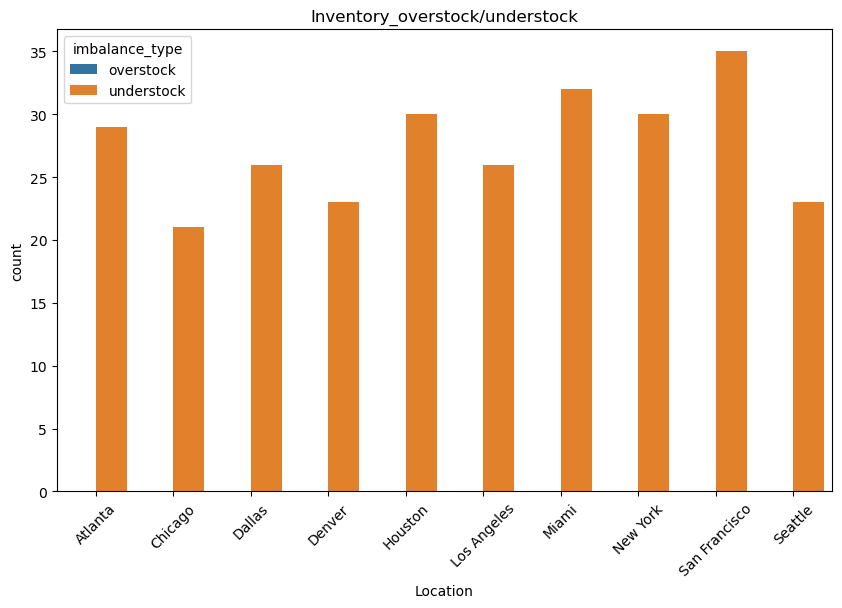

In [27]:
plt.figure (figsize=(10,6))
sns.barplot (data=imbalance_long,x='Location',y='count',hue='imbalance_type')
plt.title ('Inventory_overstock/understock')
plt.xticks (rotation=45)
plt.tight_layout
plt.show()

In [28]:
# Demand forecasted vs Actual sales

In [29]:
demand_summary = df.groupby('Product_Category')[['Demand_Forecast','Monthly_Sales']].sum().reset_index()

In [30]:
demand_melted = demand_summary.melt (id_vars='Product_Category',
                                    var_name='Type',
                                    value_name='value')

In [31]:
print(demand_melted)

  Product_Category             Type   value
0          Apparel  Demand_Forecast  320878
1       Automotive  Demand_Forecast  261340
2      Electronics  Demand_Forecast  310806
3        Furniture  Demand_Forecast  271495
4        Groceries  Demand_Forecast  314006
5          Apparel    Monthly_Sales  564991
6       Automotive    Monthly_Sales  484459
7      Electronics    Monthly_Sales  560057
8        Furniture    Monthly_Sales  516458
9        Groceries    Monthly_Sales  541821


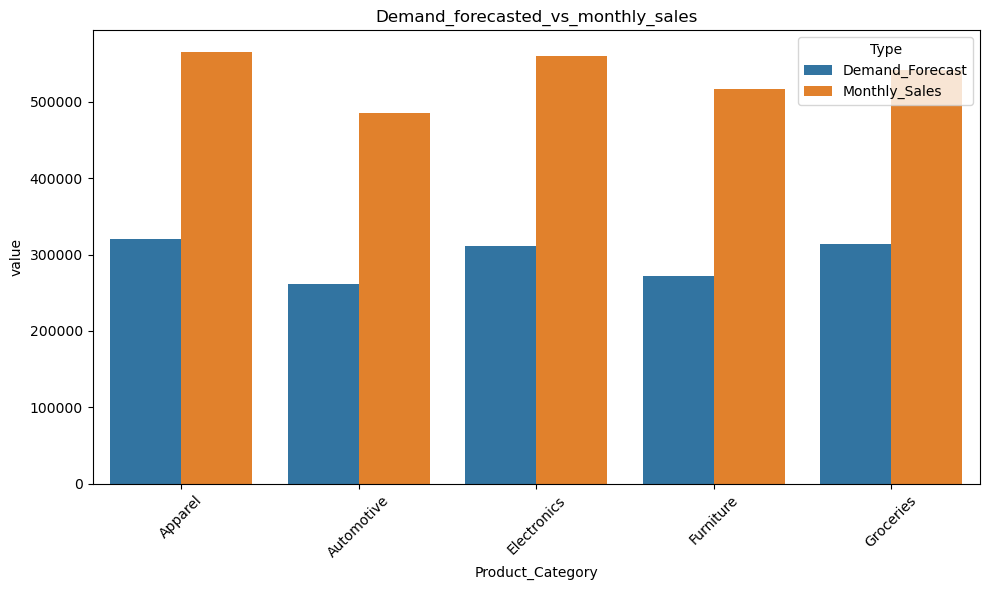

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product_Category',y='value',hue='Type',data=demand_melted)
plt.title('Demand_forecasted_vs_monthly_sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
# Analysing average profit by location

In [34]:
# assuming selling price per unit 

In [35]:
selling_price_perunit = 20
damage_cost_price_perunit = 10

In [36]:
df['revenue']=df['Monthly_Sales'] * selling_price_perunit

In [37]:
df["total_cost"] = (
    df["Operational_Cost"] +
    df["Storage_Cost"] +
    df["Transportation_Cost"] +
    (df["Damaged_Goods"] * damage_cost_price_perunit)
)

In [38]:
df['estimate_profit']=df['revenue']-df['total_cost']

In [39]:
print (df[['Location','estimate_profit','revenue','total_cost']])

     Location  estimate_profit  revenue  total_cost
0      Dallas           -16048    97860      113908
1     Houston            26466    89060       62594
2     Chicago            31616   119120       87504
3     Atlanta            46531   116280       69749
4      Dallas            -9568    45580       55148
..        ...              ...      ...         ...
495  New York            45096   118180       73084
496     Miami           -10642    91680      102322
497   Seattle           -69571    33980      103551
498   Seattle            87297   176560       89263
499    Dallas            40239   145340      105101

[500 rows x 4 columns]


In [40]:
# visualizing profit by location

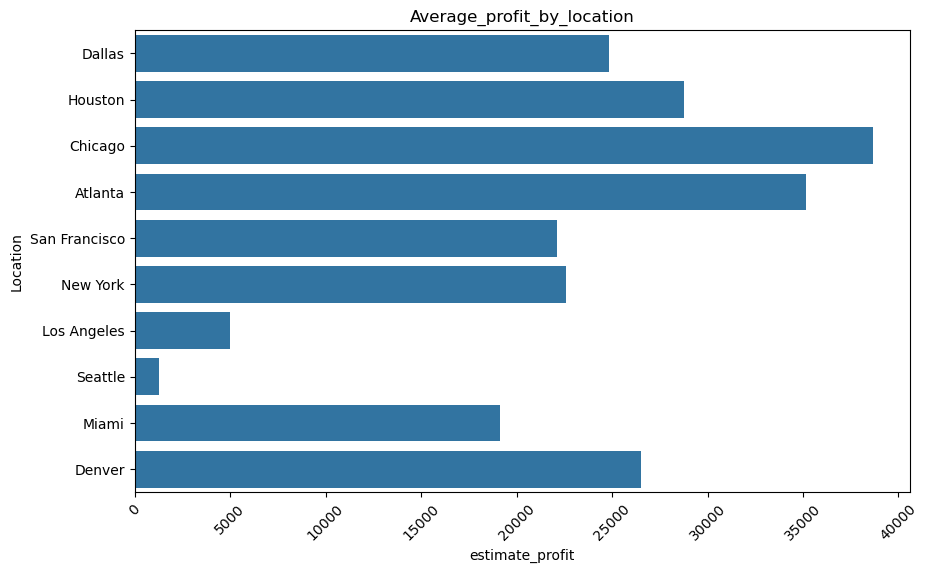

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='estimate_profit',y='Location',errorbar=None)
plt.title('Average_profit_by_location')
plt.xticks(rotation=45)
plt.tight_layout
plt.show()